# Importing Required Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

# Reading Data

In [2]:
data=pd.read_csv('AI ML Internship Training Data.xlsx - freight_delivery_realistic_data.csv')

In [3]:
data

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes
19996,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes
19997,SHIP019997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes
19998,SHIP019998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes


# Checking For Null Values

In [4]:
data['Delayed'].describe()

count     20000
unique        2
top         Yes
freq      14757
Name: Delayed, dtype: object

In [5]:
data.isnull().sum()

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64

# Dropping Null Values Since Vehicle Type Cannot Be Recreated

In [6]:
data=data.dropna()

# EDA 

In [7]:
print(data.Origin.unique())
print(data.Destination.unique())
print(data['Vehicle Type'].unique())
print(data['Weather Conditions'].unique())
print(data['Traffic Conditions'].unique())

['Jaipur' 'Bangalore' 'Mumbai' 'Hyderabad' 'Chennai' 'Kolkata' 'Lucknow'
 'Delhi' 'Ahmedabad' 'Pune']
['Mumbai' 'Delhi' 'Chennai' 'Ahmedabad' 'Kolkata' 'Lucknow' 'Bangalore'
 'Pune' 'Jaipur' 'Hyderabad']
['Trailer' 'Truck' 'Container' 'Lorry']
['Rain' 'Storm' 'Clear' 'Fog']
['Light' 'Moderate' 'Heavy']


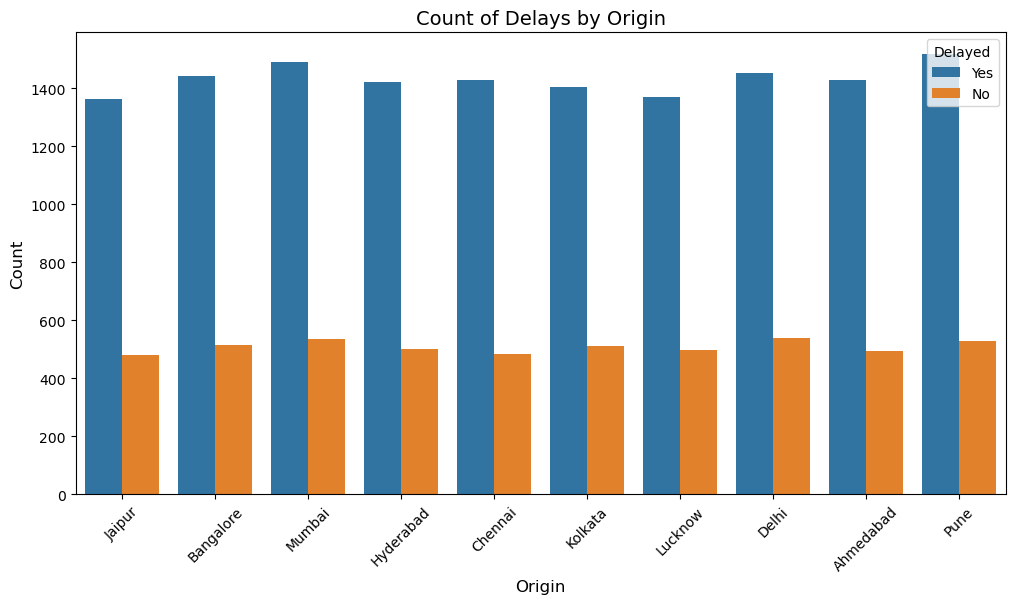

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Origin', hue='Delayed')

plt.xlabel('Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Delays by Origin', fontsize=14)
plt.xticks(rotation=45)


plt.show()

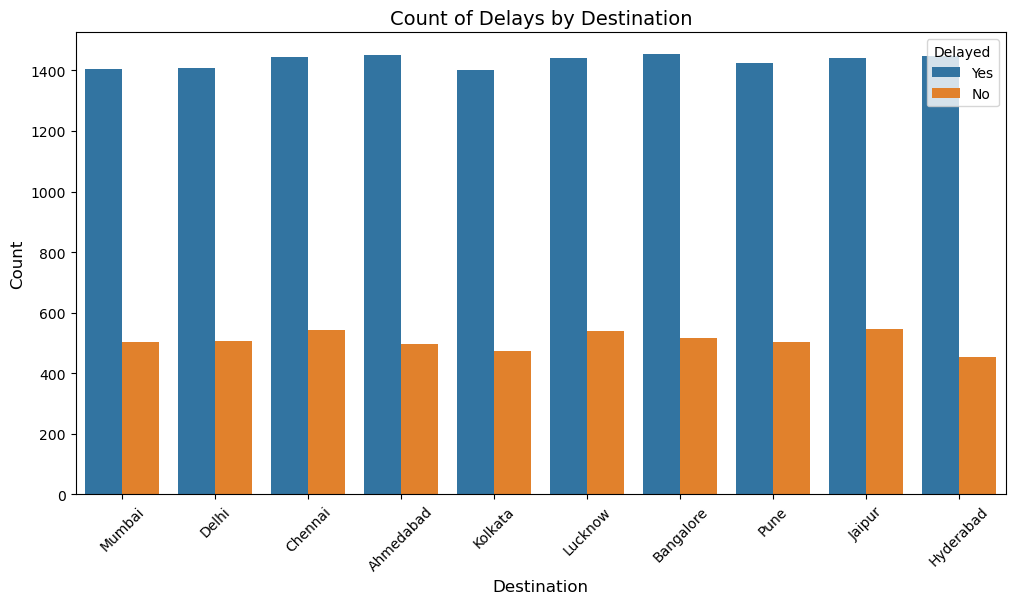

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Destination', hue='Delayed')

plt.xlabel('Destination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Delays by Destination', fontsize=14)
plt.xticks(rotation=45)


plt.show()

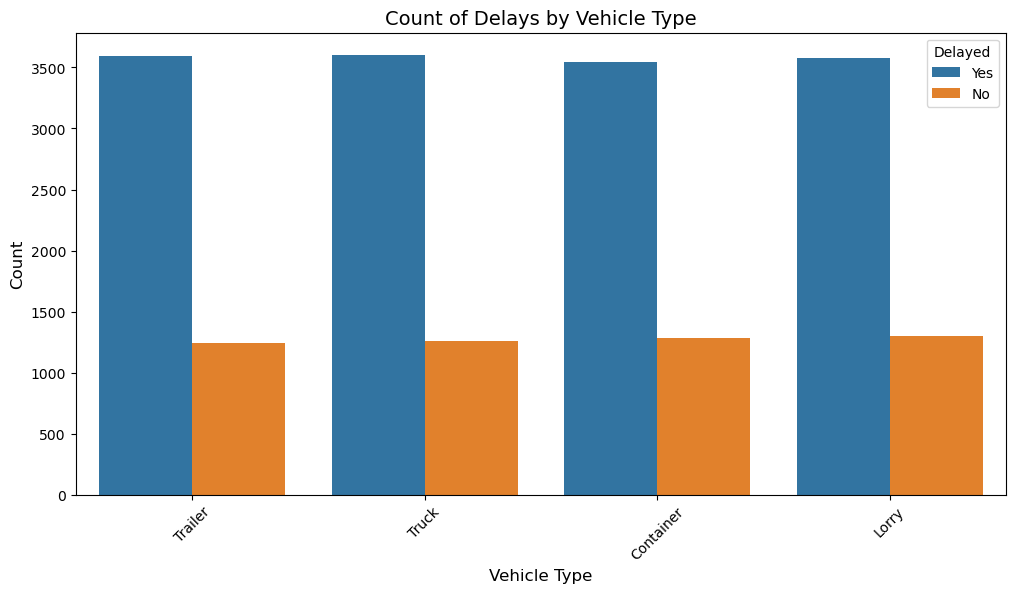

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Vehicle Type', hue='Delayed')

plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Delays by Vehicle Type', fontsize=14)
plt.xticks(rotation=45)


plt.show()

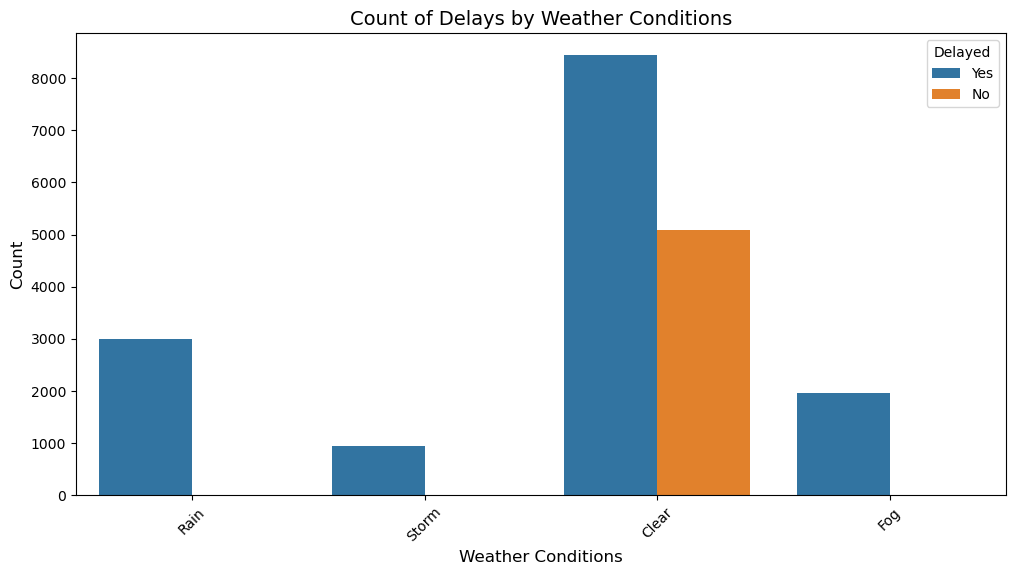

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Weather Conditions', hue='Delayed')

plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Delays by Weather Conditions', fontsize=14)
plt.xticks(rotation=45)


plt.show()

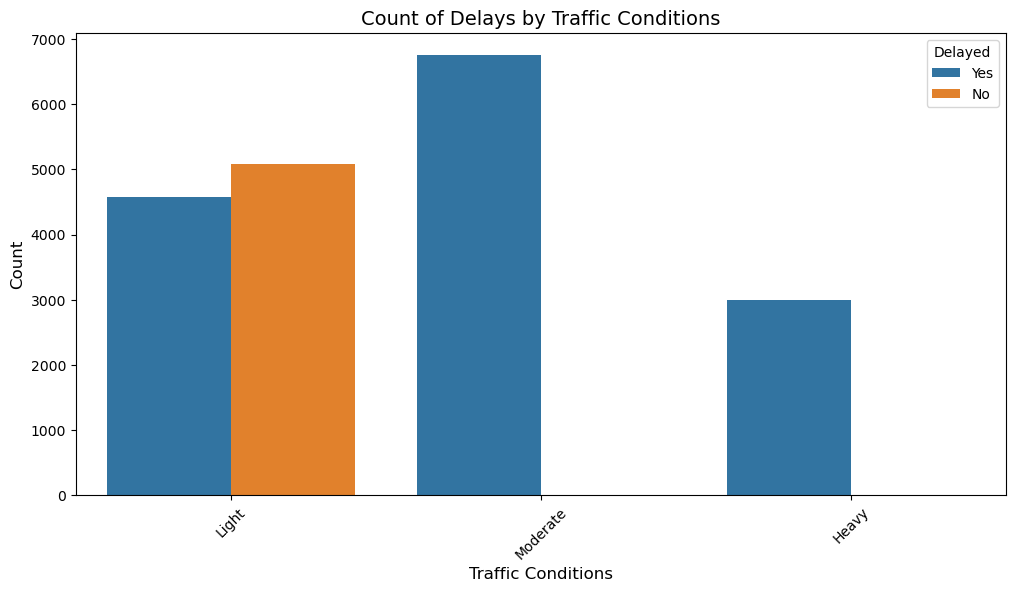

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Traffic Conditions', hue='Delayed')

plt.xlabel('Traffic Conditions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Delays by Traffic Conditions', fontsize=14)
plt.xticks(rotation=45)


plt.show()

### got the key point it always gets delayed except during clear weather and in light traffic we need to check it

# Removing Irrelevant Columns

In [13]:
data=data.drop(['Shipment ID','Planned Delivery Date','Actual Delivery Date','Shipment Date'],axis=1)

In [14]:
data

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,Jaipur,Mumbai,Trailer,1603,Rain,Light,Yes
1,Bangalore,Delhi,Trailer,1237,Storm,Moderate,Yes
2,Mumbai,Chennai,Truck,1863,Clear,Light,No
3,Hyderabad,Ahmedabad,Container,1374,Clear,Light,No
4,Chennai,Kolkata,Container,676,Clear,Heavy,Yes
...,...,...,...,...,...,...,...
19995,Chennai,Bangalore,Truck,564,Fog,Moderate,Yes
19996,Hyderabad,Jaipur,Truck,305,Storm,Moderate,Yes
19997,Hyderabad,Mumbai,Trailer,1028,Rain,Moderate,Yes
19998,Ahmedabad,Chennai,Lorry,905,Fog,Moderate,Yes


# Converting numeric data to strings

In [15]:
lab_enc=LabelEncoder()

data['Origin']=lab_enc.fit_transform(data['Origin'])
origin_dict={}
for i,j in enumerate(lab_enc.classes_):
    origin_dict[i]=j
    
data['Destination']=lab_enc.fit_transform(data['Origin'])

data['Vehicle Type']=lab_enc.fit_transform(data['Vehicle Type'])
veh_dict={}
for i,j in enumerate(lab_enc.classes_):
    veh_dict[i]=j
    
data['Weather Conditions']=lab_enc.fit_transform(data['Weather Conditions'])
weather_dict={}
for i,j in enumerate(lab_enc.classes_):
    weather_dict[i]=j
    
data['Traffic Conditions']=lab_enc.fit_transform(data['Traffic Conditions'])
traffic_dict={}
for i,j in enumerate(lab_enc.classes_):
    traffic_dict[i]=j
    
data['Delayed']=lab_enc.fit_transform(data['Delayed'])
delayed_dict={}
for i,j in enumerate(lab_enc.classes_):
    delayed_dict[i]=j

In [16]:
data

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,5,5,2,1603,2,1,1
1,1,1,2,1237,3,2,1
2,8,8,3,1863,0,1,0
3,4,4,0,1374,0,1,0
4,2,2,0,676,0,0,1
...,...,...,...,...,...,...,...
19995,2,2,3,564,1,2,1
19996,4,4,3,305,3,2,1
19997,4,4,2,1028,2,2,1
19998,0,0,1,905,1,2,1


# Dataset Split

In [17]:
y=data['Delayed']
data.drop(['Delayed'],inplace=True,axis=1)

In [18]:
# data splitting
split=0.80
train_x=data[:(int)(split*data.shape[0])]
test_x=data[(int)(split*data.shape[0]):]
train_y=y[:(int)(split*y.shape[0])]
test_y=y[(int)(split*y.shape[0]):]

In [19]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(15522, 6) (15522,) (3881, 6) (3881,)


# Model

In [20]:
# Decision Tree

clf = DecisionTreeClassifier(max_depth=5, random_state=42)

clf.fit(train_x, train_y)

y_pred = clf.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(test_y, y_pred))

Accuracy: 0.9188353517134759

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1059
           1       1.00      0.89      0.94      2822

    accuracy                           0.92      3881
   macro avg       0.89      0.94      0.91      3881
weighted avg       0.94      0.92      0.92      3881



In [21]:
# knn

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(train_x, train_y)

y_pred = knn_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(test_y, y_pred))

Accuracy: 0.6804947178562226

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.28      0.32      1059
           1       0.75      0.83      0.79      2822

    accuracy                           0.68      3881
   macro avg       0.57      0.55      0.56      3881
weighted avg       0.65      0.68      0.66      3881



In [22]:
# Since Output Of KNN Is not Good So We Use Decision Tree Model

import pickle

with open('Shipments.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Values Of Encodings

In [23]:
origin_dict

{0: 'Ahmedabad',
 1: 'Bangalore',
 2: 'Chennai',
 3: 'Delhi',
 4: 'Hyderabad',
 5: 'Jaipur',
 6: 'Kolkata',
 7: 'Lucknow',
 8: 'Mumbai',
 9: 'Pune'}

In [24]:
veh_dict

{0: 'Container', 1: 'Lorry', 2: 'Trailer', 3: 'Truck'}

In [25]:
weather_dict

{0: 'Clear', 1: 'Fog', 2: 'Rain', 3: 'Storm'}

In [26]:
traffic_dict

{0: 'Heavy', 1: 'Light', 2: 'Moderate'}

In [27]:
delayed_dict

{0: 'No', 1: 'Yes'}